In [31]:
import torch
import src.team5.models as m
import numpy as np
from matchms import Spectrum

In [13]:
batch_size, max_fragments = 8, 50

mz_values = torch.randint(100, 401, (batch_size, max_fragments)).float()
intensities = torch.rand((batch_size, max_fragments))
probabilities = intensities / intensities.sum(dim=1, keepdim=True)
labels = torch.stack([mz_values, probabilities], dim=-1)

sigma_mz = 1.0
sigma_prob = 0.1
noisy_mz = mz_values + torch.randn_like(probabilities) * sigma_prob
noisy_prob = probabilities + torch.randn_like(probabilities) * sigma_prob
noisy_prob = torch.clamp(noisy_prob, min=0)
noisy_prob = noisy_prob / noisy_prob.sum(dim=1, keepdim=True)
predicted_output = torch.stack([noisy_mz, noisy_prob], dim=-1)

(<Figure size 700x700 with 1 Axes>,
 <Axes: title={'center': 'Spectrum comparison'}, xlabel='m/z', ylabel='Intensity'>)

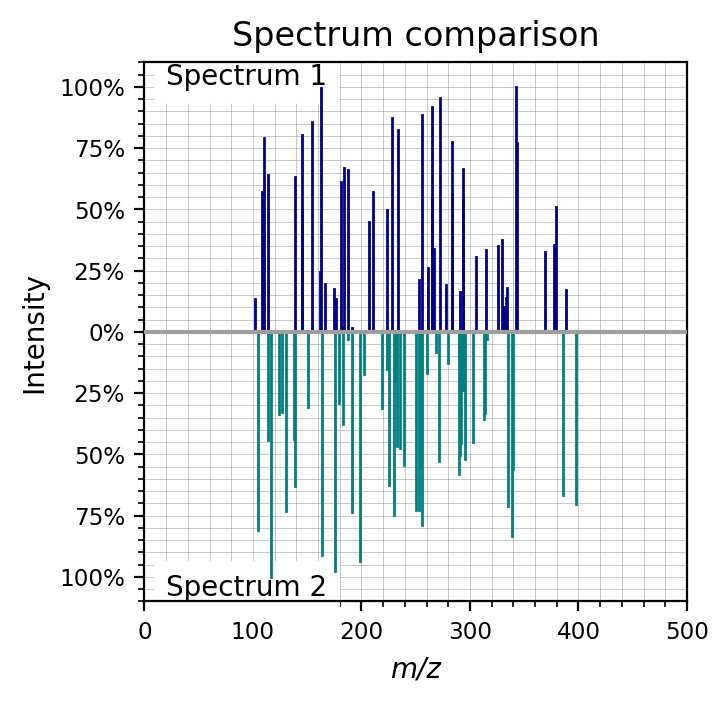

In [63]:
def makeSpectra(mz, intense):
    test_mz = np.array(mz)
    test_intensities = np.array(intense)

    test_data = np.array([test_mz, test_intensities]).transpose()
    test_mz, test_intensities = test_data[test_data[:, 0].argsort()].transpose()

    spec = Spectrum(
            test_mz, test_intensities
            )
    return spec


specA = makeSpectra(noisy_mz[0], intensities[0])
specB = makeSpectra(noisy_mz[1], intensities[1])

specA.plot_against(specB, figsize=(3.5, 3.5))